In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
netflix = pd.read_csv('netflix_data.csv')

In [3]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
## 1. which type has been seen most

In [5]:
netflix_type = netflix.groupby('type').count()
netflix_type

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
type,,,,,,,,,,,
Movie,6131,6131,5943,5656,5691,6131,6131,6129,6128,6131,6131
TV Show,2676,2676,230,2326,2285,2666,2676,2674,2676,2676,2676


In [6]:
netflix_type = netflix.groupby('type').count()['show_id']
netflix_type

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

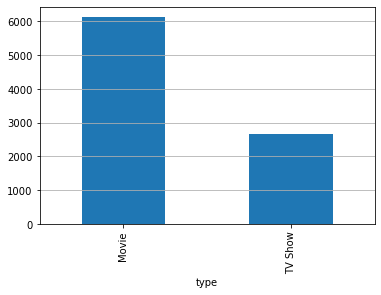

In [7]:
netflix_type.plot(kind = 'bar')
plt.grid(axis = 'y')

In [8]:
## 2. most movie or tv show start with

In [47]:
titles = netflix['title']
titles

0        Dick Johnson Is Dead
1               Blood & Water
2                   Ganglands
3       Jailbirds New Orleans
4                Kota Factory
                ...          
8802                   Zodiac
8803              Zombie Dumb
8804               Zombieland
8805                     Zoom
8806                   Zubaan
Name: title, Length: 8807, dtype: object

In [48]:
type(titles)

pandas.core.series.Series

In [49]:
titles = titles.tolist()
titles

['Dick Johnson Is Dead',
 'Blood & Water',
 'Ganglands',
 'Jailbirds New Orleans',
 'Kota Factory',
 'Midnight Mass',
 'My Little Pony: A New Generation',
 'Sankofa',
 'The Great British Baking Show',
 'The Starling',
 'Vendetta: Truth, Lies and The Mafia',
 'Bangkok Breaking',
 'Je Suis Karl',
 'Confessions of an Invisible Girl',
 'Crime Stories: India Detectives',
 'Dear White People',
 "Europe's Most Dangerous Man: Otto Skorzeny in Spain",
 'Falsa identidad',
 'Intrusion',
 'Jaguar',
 'Monsters Inside: The 24 Faces of Billy Milligan',
 'Resurrection: Ertugrul',
 'Avvai Shanmughi',
 'Go! Go! Cory Carson: Chrissy Takes the Wheel',
 'Jeans',
 'Love on the Spectrum',
 'Minsara Kanavu',
 'Grown Ups',
 'Dark Skies',
 'Paranoia',
 'Ankahi Kahaniya',
 'Chicago Party Aunt',
 'Sex Education',
 'Squid Game',
 'Tayo and Little Wizards',
 'The Father Who Moves Mountains',
 'The Stronghold',
 'Angry Birds',
 'Birth of the Dragon',
 'Chhota Bheem',
 'He-Man and the Masters of the Universe',
 'Jaws

In [50]:
type(titles)

list

In [80]:
titles_dict = {}
for title in titles:
    if ((title[0]>= 'A' and title[0] <= 'z') or (title[0]>= '0' and title[0] <= '9')):
        if title[0] not in titles_dict:    
            titles_dict[title[0]] = 1
        else:
            titles_dict[title[0]]  += 1
  
# titles_dict = sorted(titles_dict.items())
print(titles_dict)

{'D': 375, 'B': 576, 'G': 265, 'J': 191, 'K': 239, 'M': 637, 'S': 719, 'T': 1525, 'V': 75, 'C': 476, 'E': 199, 'F': 278, 'I': 229, 'R': 307, 'A': 566, 'L': 385, 'P': 330, 'H': 367, 'N': 202, 'Y': 67, 'O': 189, 'U': 100, 'W': 266, 'Q': 30, '2': 27, '3': 16, '4': 9, '9': 8, '6': 9, 'X': 9, 'Z': 37, '7': 13, '5': 9, '1': 39}


In [81]:
titles_series = pd.Series(titles_dict)
titles_series

D     375
B     576
G     265
J     191
K     239
M     637
S     719
T    1525
V      75
C     476
E     199
F     278
I     229
R     307
A     566
L     385
P     330
H     367
N     202
Y      67
O     189
U     100
W     266
Q      30
2      27
3      16
4       9
9       8
6       9
X       9
Z      37
7      13
5       9
1      39
dtype: int64

In [87]:
titles_series.sort_index(inplace = True)
titles_series

1      39
2      27
3      16
4       9
5       9
6       9
7      13
9       8
A     566
B     576
C     476
D     375
E     199
F     278
G     265
H     367
I     229
J     191
K     239
L     385
M     637
N     202
O     189
P     330
Q      30
R     307
S     719
T    1525
U     100
V      75
W     266
X       9
Y      67
Z      37
dtype: int64

In [94]:
print('Maximum movies or tv show start with ' + str(titles_series.max()) + ' Index is ' + titles_series.idxmax())

Maximum movies or tv show start with 1525 Index is T
